In [27]:
import numpy as np
import pandas as pd

In [48]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [49]:
!pip install tensorflow-gpu

In [50]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [51]:
from keras.datasets import mnist

In [59]:
#making function load_dataset
def load_dataset():
  (train_x,train_y),(test_x,test_y)=mnist.load_data()
  train_x = train_x.reshape((train_x.shape[0],28,28,1))
  test_x = test_x.reshape((test_x.shape[0],28,28,1))
  train_y = to_categorical(train_y)
  test_y = to_categorical(test_y)
  return train_x, train_y, test_x, test_y

  
   
	 
   
	 
	
 

In [60]:
def pixel_norm(train,test):
  #converting train data to float type so that when normlised can be divided by 255 and kept in range of [0,1]
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  return train_norm,test_norm

In [66]:
#defining the baseline model with a simple of convolution layer , max-pool layer and then flatten it out and add dense layers for fully -connected layer
def baseline_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  #model compiliation:
  optimizer=SGD(lr=0.01,momentum=0.9)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model
	
  
  
  
  
  
  

In [75]:
def evaluate_model(data_x, data_y, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(data_x):
		# define model
		model = baseline_model()
		# select rows for train and test
		train_x, train_y, test_x, test_y = data_x[train_ix], data_y[train_ix], data_x[test_ix], data_y[test_ix]
		# fit model
		history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(test_x, test_y), verbose=0)
		# evaluate model
		_, acc = model.evaluate(test_x, test_y, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [76]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

In [77]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

> 98.575
> 98.758
> 98.683
> 98.683
> 98.817


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


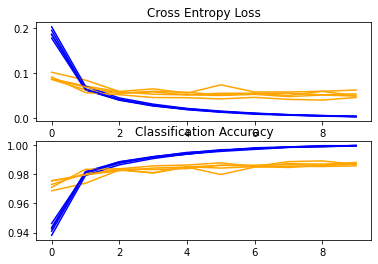

Accuracy: mean=98.703 std=0.081, n=5


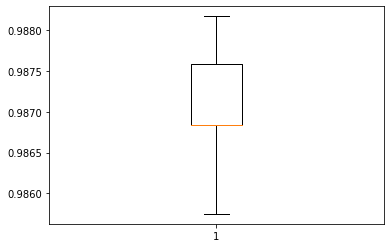

In [78]:
def run_test_harness():
	# load dataset
	train_x, train_y, test_x, test_y = load_dataset()
	# prepare pixel data
	train_x, test_x = pixel_norm(train_x, test_x)
	# evaluate model
	scores, histories = evaluate_model(train_x, train_y)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)
 
# entry point, run the test harness
run_test_harness()